In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
dataPath = r"C:\Users\rohit\projects\Self_mentl_analysis\mental-health-in-tech-survey\survey.csv"
data = pd.read_csv(dataPath)
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
#Check the dataset for missing data
if data.isnull().sum().sum() == 0 :
    print ('There is no missing data in our dataset')
else:
    print('There is {} missing data in our dataset '.format(data.isnull().sum().sum()))

There is 1892 missing data in our dataset 


In [4]:
#Check our missing data from which columns and how many unique features they have. 
frame = pd.concat([data.isnull().sum(), data.nunique(), data.dtypes], axis = 1, sort= False)
frame

,0,1,2
Timestamp,0,1246,object
Age,0,53,int64
Gender,0,49,object
Country,0,48,object
state,515,45,object
self_employed,18,2,object
family_history,0,2,object
treatment,0,2,object
work_interfere,264,4,object
no_employees,0,6,object


Four columns have missing data, state , work_interfere, self_employed and comments.
State and comments are not important to me, so I'm gonna drop them but, we need to fill in Missing data for work_interfere and, self_employed

In [5]:
#Look at what is in the 'Work_interfere' column to choose a suitable method to fill nan values.
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

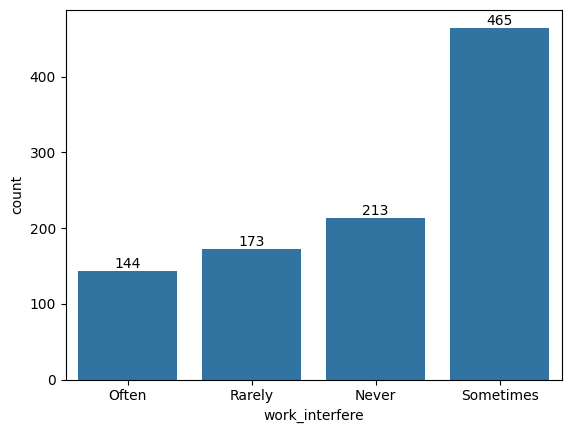

In [6]:
#Plot **work_interfere**
ax = sns.countplot(data = data , x = 'work_interfere');
#Add the value of each parametr on the Plot
ax.bar_label(ax.containers[0]);

In [7]:
from sklearn.impute import SimpleImputer

# Drop unnecessary columns
data = data.drop(columns=['state', 'comments', 'Timestamp'])

# First, use fillna() before SimpleImputer (avoiding inplace issue)
data.loc[:, 'work_interfere'] = data['work_interfere'].fillna("Unknown")
data.loc[:, 'self_employed'] = data['self_employed'].fillna("Not Specified")


# Display updated DataFrame
data.head()


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,Not Specified,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,Not Specified,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,Not Specified,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Not Specified,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,Not Specified,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


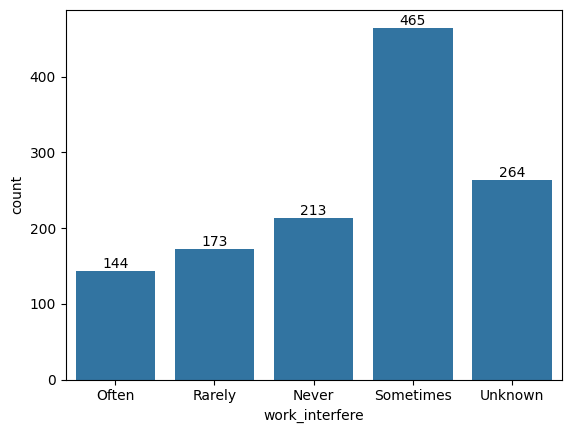

In [8]:
ax = sns.countplot(data=data, x='work_interfere');
ax.bar_label(ax.containers[0]);


In [9]:
print(data['Gender'].unique())
print('')
print('-'*75)
print('')
#Check number of unique data too.
print('number of unique Gender in our dataset is :', data['Gender'].nunique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']

---------------------------------------------------------------------------

number of unique Gender in our dataset is : 49


In [10]:
# Standardizing gender categories
data.loc[:, 'Gender'] = data['Gender'].replace(
    ['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
     'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make'], 'Male')

data.loc[:, 'Gender'] = data['Gender'].replace(
    ['Female ', 'female', 'F', 'f', 'Woman', 'Female',
     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
     'woman'], 'Female')

data.loc[:, 'Gender'] = data["Gender"].replace(
    ['Female (trans)', 'queer/she/they', 'non-binary',
     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
     'Agender', 'A little about you', 'Nah', 'All',
     'ostensibly male, unsure what that really means',
     'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
     'Guy (-ish) ^_^', 'Trans woman'], 'Other')

# Print unique values to verify
print(data['Gender'].unique())


['Female' 'Male' 'Other']


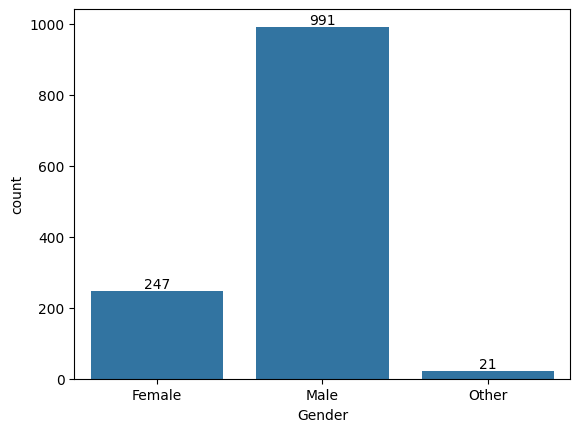

In [11]:
#Plot Genders column after cleaning and new categorizing
ax = sns.countplot(data=data, x='Gender');
ax.bar_label(ax.containers[0]);

In [12]:
#Let's check duplicated data.
if data.duplicated().sum() == 0:
    print('There is no duplicated data:')
else:
    print('Tehre is {} duplicated data:'.format(data.duplicated().sum()))
    #If there is duplicated data drop it.
    data.drop_duplicates(inplace=True)
    
print('-'*50)
print(data.duplicated().sum())


Tehre is 4 duplicated data:
--------------------------------------------------
0


In [13]:
#look unique data in Age column
data['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [14]:
#We had a lot of nonsense answers in the Age column too
#This filtering will drop entries exceeding 100 years and those indicating negative values.
# Remove invalid ages (negative values or values above 99)
data = data.loc[(data['Age'] >= 0) & (data['Age'] <= 99)].copy()

# Print unique age values to verify
data['Age'].unique()


array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72],
      dtype=int64)

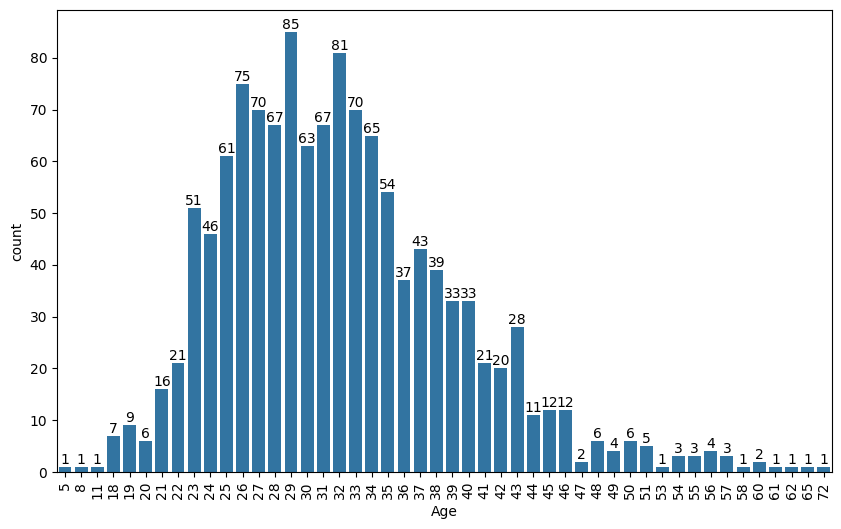

In [15]:
#Let's see the Age distribution in this dataset.
plt.figure(figsize = (10,6))
age_range_plot = sns.countplot(data = data, x = 'Age');
age_range_plot.bar_label(age_range_plot.containers[0]);
plt.xticks(rotation=90);

<Figure size 1000x600 with 0 Axes>

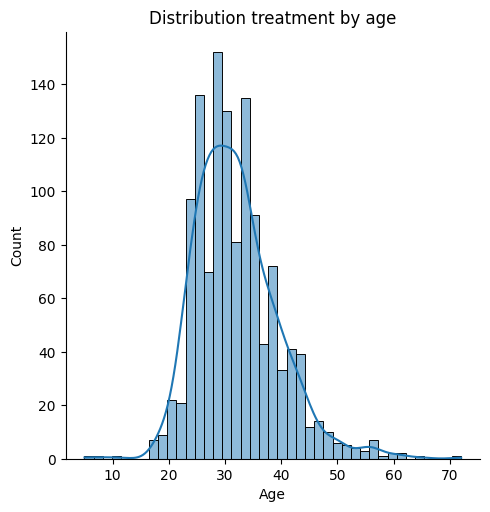

In [16]:
#In this plot moreover on Age distribution we can see treatment distribution by age
plt.figure(figsize=(10, 6));
sns.displot(data['Age'], kde = 'treatment');
plt.title('Distribution treatment by age');

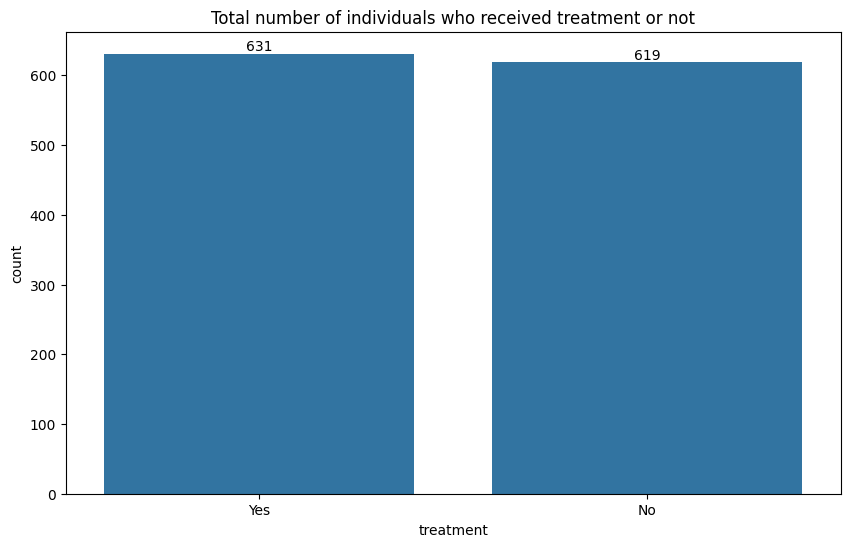

In [17]:
#In this plot We can see Total number of individuals who received treatment or not.
plt.figure(figsize = (10,6));
treat = sns.countplot(data = data,  x = 'treatment');
treat.bar_label(treat.containers[0]);
plt.title('Total number of individuals who received treatment or not');


In [18]:
#Check Dtypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1250 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1250 non-null   int64 
 1   Gender                     1250 non-null   object
 2   Country                    1250 non-null   object
 3   self_employed              1250 non-null   object
 4   family_history             1250 non-null   object
 5   treatment                  1250 non-null   object
 6   work_interfere             1250 non-null   object
 7   no_employees               1250 non-null   object
 8   remote_work                1250 non-null   object
 9   tech_company               1250 non-null   object
 10  benefits                   1250 non-null   object
 11  care_options               1250 non-null   object
 12  wellness_program           1250 non-null   object
 13  seek_help                  1250 non-null   object
 14  anonymity    

In [19]:
#Use LabelEncoder to change the Dtypes to 'int'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#Make the dataset include all the columns we need to change their dtypes
columns_to_encode = ['Gender', 'Country', 'self_employed','family_history', 'treatment', 'work_interfere','no_employees',
                             'remote_work', 'tech_company','benefits','care_options', 'wellness_program',
                             'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
                             'coworkers', 'supervisor', 'mental_health_interview','phys_health_interview',
                             'mental_vs_physical', 'obs_consequence']
#Write a Loop for fitting LabelEncoder on columns_to_encode
for columns in columns_to_encode:
    data[columns] = le.fit_transform(data[columns])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1250 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1250 non-null   int64
 1   Gender                     1250 non-null   int32
 2   Country                    1250 non-null   int32
 3   self_employed              1250 non-null   int32
 4   family_history             1250 non-null   int32
 5   treatment                  1250 non-null   int32
 6   work_interfere             1250 non-null   int32
 7   no_employees               1250 non-null   int32
 8   remote_work                1250 non-null   int32
 9   tech_company               1250 non-null   int32
 10  benefits                   1250 non-null   int32
 11  care_options               1250 non-null   int32
 12  wellness_program           1250 non-null   int32
 13  seek_help                  1250 non-null   int32
 14  anonymity                  12

In [20]:
#Let's check Standard deviation 
data.describe()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1250.00000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,...,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000
mean,32.02400,0.81760,37.792800,0.243200,0.390400,0.504800,2.337600,2.786400,0.298400,0.820000,...,0.648000,1.410400,0.849600,0.830400,0.973600,1.100800,0.868800,0.716000,0.814400,0.14480
std,7.38408,0.42388,13.334981,0.642794,0.488035,0.500177,1.375041,1.738733,0.457739,0.384341,...,0.909482,1.509634,0.766453,0.485205,0.620009,0.843806,0.425831,0.723715,0.835051,0.35204
min,5.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,27.00000,1.00000,42.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000
50%,31.00000,1.00000,45.000000,0.000000,0.000000,1.000000,3.000000,3.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
75%,36.00000,1.00000,45.000000,0.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.00000
max,72.00000,2.00000,46.000000,2.000000,1.000000,1.000000,4.000000,5.000000,1.000000,1.000000,...,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.00000


In [22]:
from sklearn.model_selection import train_test_split

#I wanna work on 'treatment' column.
X = data.drop(columns = ['treatment'])
y = data['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27)

print(X_train.shape, y_train.shape)
print('-'*32)
print(X_test.shape, y_test.shape)
print('_'*32)

(912, 23) (912,)
--------------------------------
(338, 23) (338,)
________________________________


In [23]:
from sklearn.linear_model import LogisticRegression

# Train the model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       166
           1       0.74      0.66      0.70       172

    accuracy                           0.71       338
   macro avg       0.71      0.71      0.71       338
weighted avg       0.71      0.71      0.71       338



In [24]:
from xgboost import XGBClassifier

# Train the model
xgb = XGBClassifier( eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Performance:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       166
           1       0.77      0.78      0.78       172

    accuracy                           0.77       338
   macro avg       0.77      0.77      0.77       338
weighted avg       0.77      0.77      0.77       338



In [25]:
from sklearn.neural_network import MLPClassifier

# Define and train the neural network
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp.predict(X_test)

# Evaluation
print("Neural Network (MLP) Performance:")
print(classification_report(y_test, y_pred_mlp))


Neural Network (MLP) Performance:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       166
           1       0.76      0.74      0.75       172

    accuracy                           0.75       338
   macro avg       0.75      0.75      0.75       338
weighted avg       0.75      0.75      0.75       338



In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       166
           1       0.79      0.81      0.80       172

    accuracy                           0.79       338
   macro avg       0.79      0.79      0.79       338
weighted avg       0.79      0.79      0.79       338



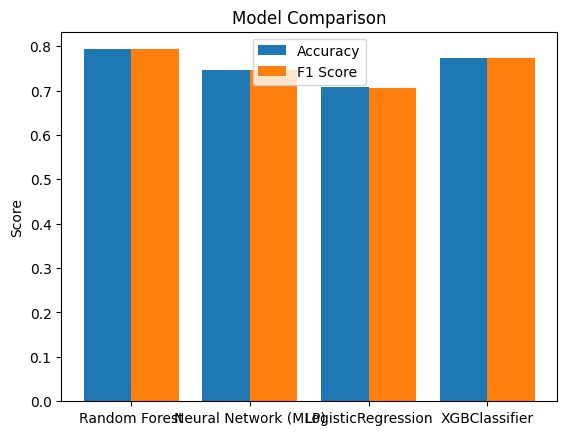

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score

# Collect metrics
models = ["Random Forest", "Neural Network (MLP)","LogisticRegression","XGBClassifier"]
accuracy = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_mlp),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_xgb)
    
]
f1_scores = [
    f1_score(y_test, y_pred_rf, average='weighted'),
    f1_score(y_test, y_pred_mlp, average='weighted'),
    f1_score(y_test, y_pred_lr, average='weighted'),
    f1_score(y_test, y_pred_xgb, average='weighted')
]

# Plot comparison
 
x = np.arange(len(models))

plt.bar(x - 0.2, accuracy, 0.4, label='Accuracy')
plt.bar(x + 0.2, f1_scores, 0.4, label='F1 Score')
plt.xticks(x, models)
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.show()


100%|===================| 675/676 [00:23<00:00]        

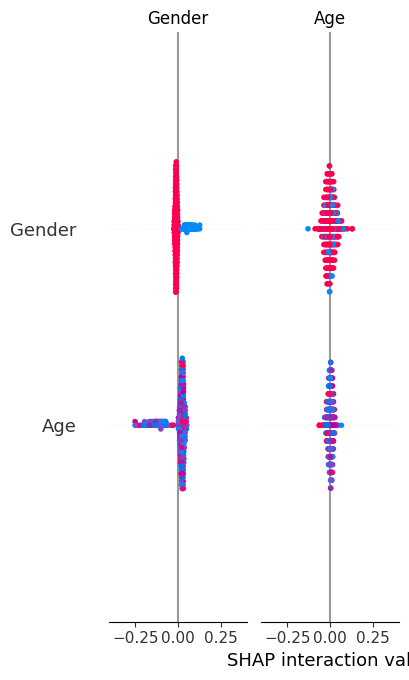

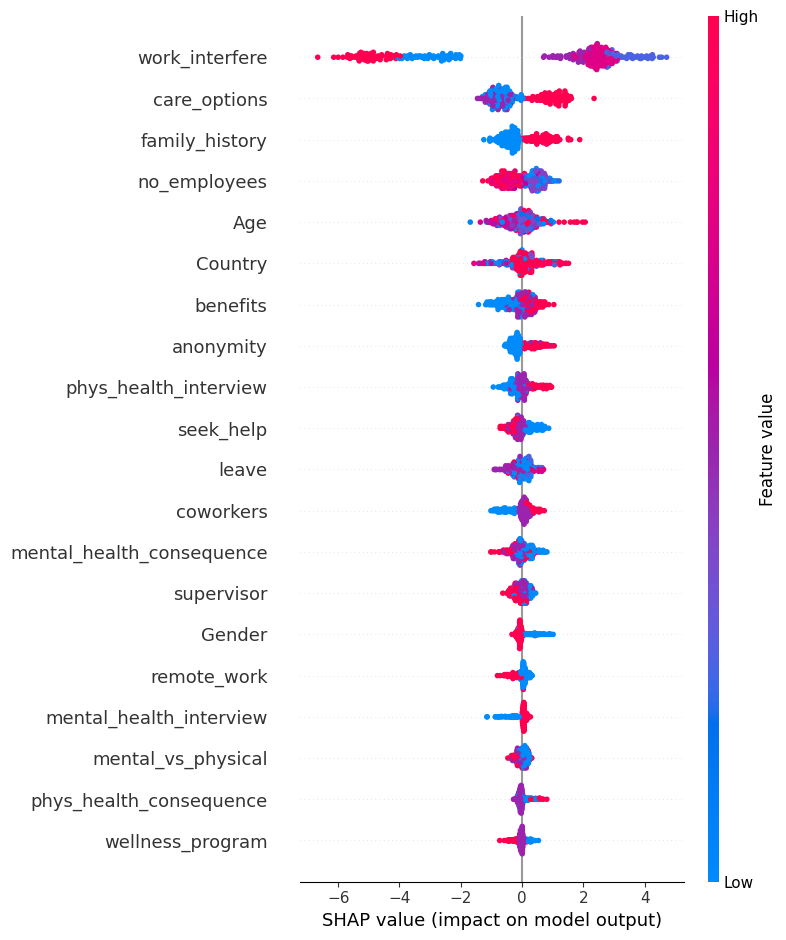

In [55]:
import shap

# Convert X_test to NumPy (if it's a Pandas DataFrame)
X_test_np = X_test.to_numpy() if hasattr(X_test, "to_numpy") else X_test

# SHAP for Random Forest
explainer_rf = shap.Explainer(rf, X_test)
shap_values_rf = explainer_rf(X_test)

# SHAP for XGBoost
explainer_xgb = shap.Explainer(xgb,X_test)
shap_values_xgb = explainer_xgb(X_test)

# ✅ Fix: Convert `X_test` to NumPy array before plotting
shap.summary_plot(shap_values_rf, X_test_np, feature_names=X_test.columns, title="Random Forest - Feature Importance")
shap.summary_plot(shap_values_xgb, X_test_np, feature_names=X_test.columns, title="XGBoost - Feature Importance")


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

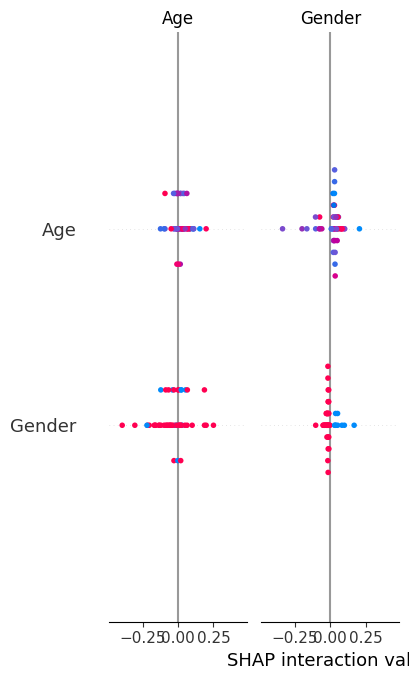

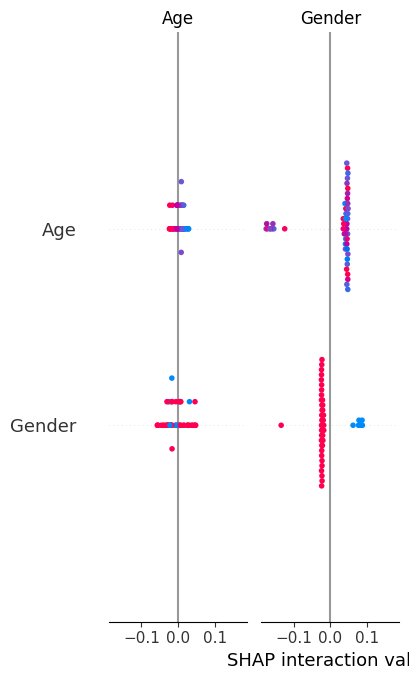

In [58]:
import shap
import numpy as np

# Select background data (sample 100 random points)
background = X_test.sample(100, random_state=42)

# SHAP for MLP
explainer_mlp = shap.KernelExplainer(mlp.predict_proba, background)
shap_values_mlp = explainer_mlp.shap_values(X_test[:50])  # Compute for first 50 samples

# SHAP for Logistic Regression
explainer_lr = shap.KernelExplainer(lr.predict_proba, background)
shap_values_lr = explainer_lr.shap_values(X_test[:50])

# Plot Feature Importance
shap.summary_plot(shap_values_mlp, X_test[:50], title="MLP - Feature Importance")
shap.summary_plot(shap_values_lr, X_test[:50], title="Logistic Regression - Feature Importance")


In [60]:
# After training your model (for example, RandomForest)
import joblib
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



# Save the trained model
joblib.dump(rf, 'mental_health_model.pkl')
print("Model saved successfully!")


Model saved successfully!


In [78]:
# Inference part to load the saved model and make predictions
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('mental_health_model.pkl')

# Function to get new symptom data
def get_new_symptom_data():
    new_data = {
         'Age':34,
         'Gender': 2, 
         'Country':3,
         'self_employed': 0, 
         'family_history':0,
         'work_interfere':1,
         'no_employees':0, 
         'remote_work':0,
         'tech_company':1,
         'benefits':0,
         'care_options':0, 
         'wellness_program':0, 
         'seek_help':1, 
         'anonymity':2, 
         'leave':2, 
         'mental_health_consequence':0, 
         'phys_health_consequence':0, 
         'coworkers':10,
         'supervisor':12, 
         'mental_health_interview':10, 
         'phys_health_interview':0, 
         'mental_vs_physical':2, 
         'obs_consequence':0

    }
    return pd.DataFrame([new_data])

# Get the new data and make predictions
new_input = get_new_symptom_data()
prediction = model.predict(new_input)
probability = model.predict_proba(new_input)

print(f"Prediction: {prediction[0]}")  # Print the prediction result
print(f"Prediction Probability: {probability[0]}")  # Print the probability of each class


Prediction: 1
Prediction Probability: [0.45 0.55]
